#Step 1: Loading the Dataset and Initial Inspection

In [7]:
import pandas as pd

# Load the Titanic dataset into a Pandas DataFrame
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
titanic_data = pd.read_csv(url)

# Display basic information about the dataset
print(titanic_data.info())
print(titanic_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

#Step 2: Preprocessing the Data

In [8]:
# Handling missing values
titanic_data.isnull().sum()  # Check for missing values in columns

# Fill missing values in 'Age' column with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Drop 'Cabin' column due to many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Handling categorical variables like 'Sex' and 'Embarked'
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verify changes
print(titanic_data.isnull().sum())  # Check for missing values again
print(titanic_data.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 

#Step 3: Exploratory Data Analysis (EDA) and Visualization

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   1

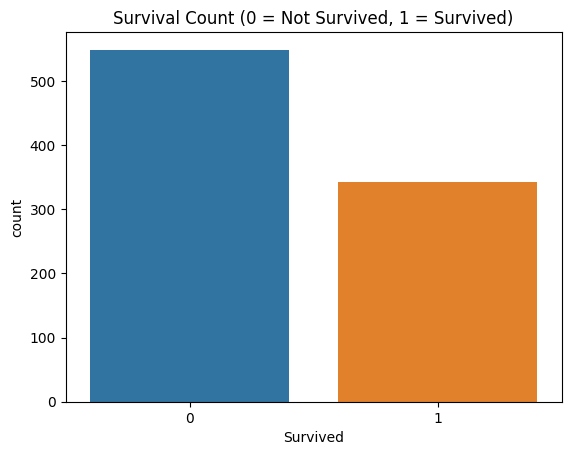

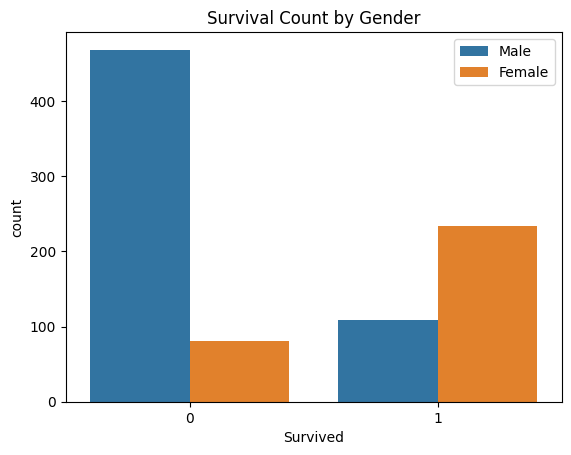

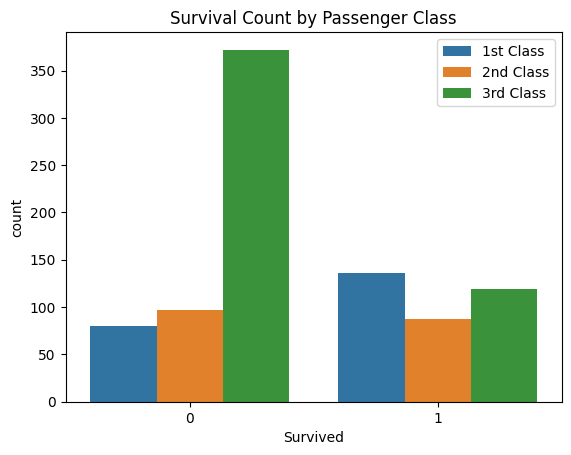

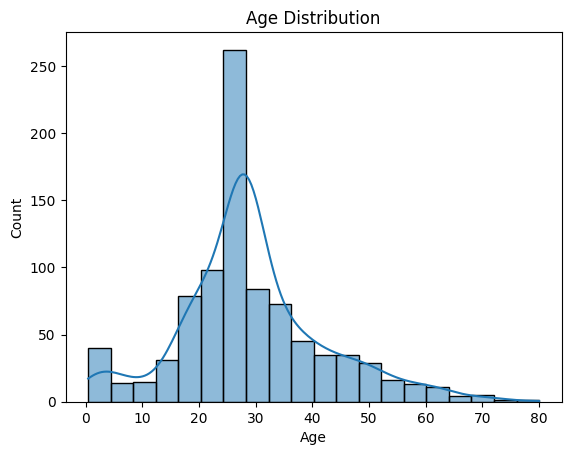

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(titanic_data.describe())

# Visualization: Survived vs. Not Survived
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

# Visualization: Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.legend(['Male', 'Female'])
plt.show()

# Visualization: Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

# Visualization: Age distribution
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#Step 4: Mapping Questions to Generate Answers

##Question 1: What is the survival rate based on gender?

In [10]:
# Calculate survival rate by gender
survival_rate_gender = titanic_data.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_rate_gender)


Survival Rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


##Question 2: Did passenger class affect survival chances?

In [11]:
# Calculate survival rate by passenger class
survival_rate_class = titanic_data.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_rate_class)



Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


##Question 3: Is there a relationship between age and survival?

In [12]:
# Calculate survival rate by age group
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 80])
survival_rate_age = titanic_data.groupby('Age_Group')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_rate_age)



Survival Rate by Age Group:
Age_Group
(0, 18]     0.503597
(18, 30]    0.331096
(30, 50]    0.423237
(50, 80]    0.343750
Name: Survived, dtype: float64


##Question 4: How did the fare paid correlate with survival?

In [13]:
# Calculate survival rate by fare
titanic_data['Fare_Group'] = pd.qcut(titanic_data['Fare'], q=4)
survival_rate_fare = titanic_data.groupby('Fare_Group')['Survived'].mean()
print("\nSurvival Rate by Fare Group:")
print(survival_rate_fare)



Survival Rate by Fare Group:
Fare_Group
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


##Question 5: Did having family aboard influence survival rates?

In [14]:
# Calculate survival rate by family presence
titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['Family'] = titanic_data['Family'].apply(lambda x: 1 if x > 0 else 0)
survival_rate_family = titanic_data.groupby('Family')['Survived'].mean()
print("\nSurvival Rate by Family Presence:")
print(survival_rate_family)



Survival Rate by Family Presence:
Family
0    0.303538
1    0.505650
Name: Survived, dtype: float64
